### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#agregamos las 4 tiendas

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


#Identificamos cada una

tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

#Aplicamos para que hablen el mismo idioma

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

#Total de cada tienda

facturacion = df.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)

# Convert facturacion to millions
facturacion_millones = facturacion / 1_000_000

#Total datos

print("Facturación total por tienda (en millones de pesos):\n")
print(facturacion_millones)



Facturación total por tienda (en millones de pesos):

Tienda
Tienda 1    1150.8804
Tienda 2    1116.3435
Tienda 3    1098.0196
Tienda 4    1038.3757
Name: Precio, dtype: float64


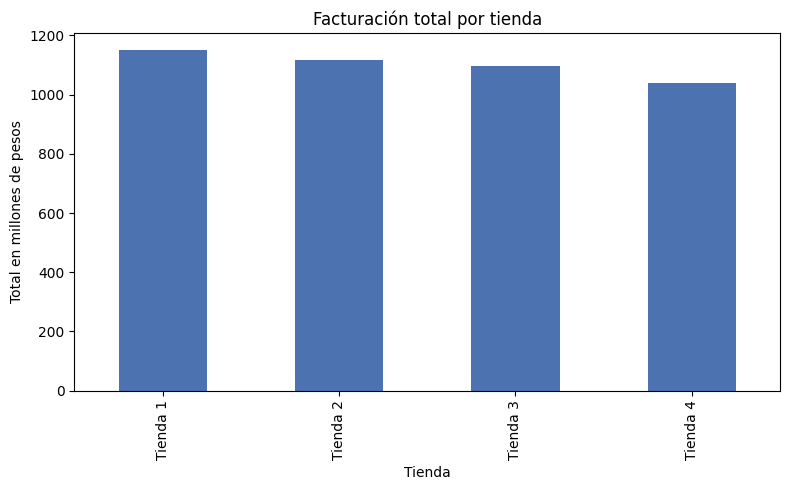

In [14]:
#Graficamos

plt.figure(figsize=(8,5))
facturacion_millones.plot(kind="bar", color="#4C72B0")
plt.title("Facturación total por tienda")
plt.ylabel("Total en millones de pesos")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [22]:
#Agrupamos por tienda y categoría ademas de contar las cantidades de productos vendidos

ventas_categoria = df.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad")

#Dejamos que las tiendas queden en columna

ventas_pivot = ventas_categoria.pivot(index="Categoría del Producto", columns="Tienda", values="Cantidad").fillna(0)

#Generamos una tabla

print("Cantidad de productos vendidos por categoría y tienda:\n")
print(ventas_pivot)

Cantidad de productos vendidos por categoría y tienda:

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


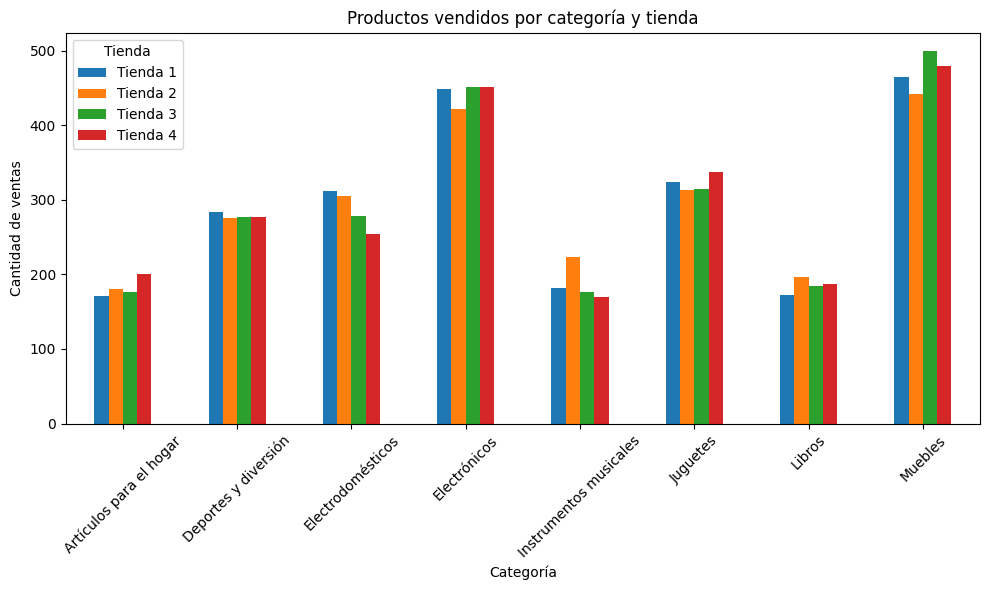

In [23]:
#Agrupamos grafico de barras

ventas_pivot.plot(kind="bar", figsize=(10,6))
plt.title("Productos vendidos por categoría y tienda")
plt.ylabel("Cantidad de ventas")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Tienda")
plt.show()

# 3. Calificación promedio de la tienda


In [24]:
#Calculamos promedio por tienda

calificacion_promedio = df.groupby("Tienda")["Calificación"].mean().round(2).sort_values(ascending=False)

#Generamos los resiltados

print(" Calificación promedio de los clientes por tienda:\n")
print(calificacion_promedio)



 Calificación promedio de los clientes por tienda:

Tienda
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: float64


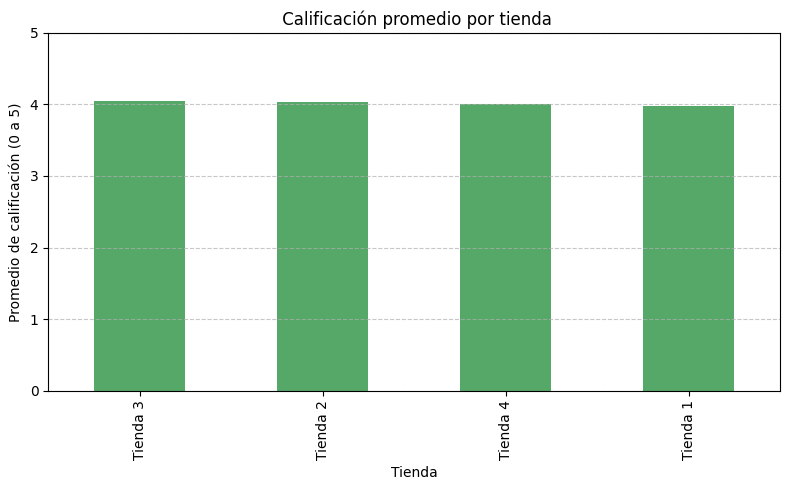

In [25]:

#Grafico calificación por tienda

plt.figure(figsize=(8,5))
calificacion_promedio.plot(kind="bar", color="#55A868")
plt.title(" Calificación promedio por tienda")
plt.ylabel("Promedio de calificación (0 a 5)")
plt.xlabel("Tienda")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

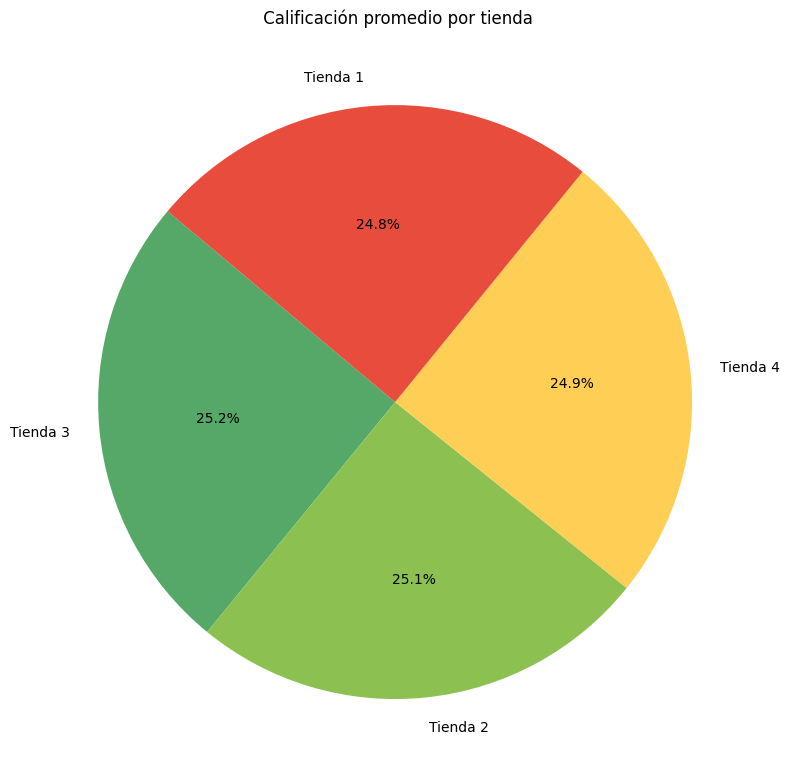

In [60]:
#Grafico calificación por tienda como un gráfico circular

plt.figure(figsize=(8,8))
plt.pie(calificacion_promedio, labels=calificacion_promedio.index, autopct='%1.1f%%', startangle=140, colors=['#55A868', '#8CC152', '#FFCE54', '#E74C3C'])
plt.title(" Calificación promedio por tienda")
plt.axis('equal') # Equal = La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [56]:
#Función para mostrar los productos más vendidos y menos vendidos

def plot_top_least_sold_products(df, tienda, top=5):
    conteo = df["Producto"].value_counts()
    print(f"\n Top {top} productos más vendidos en {tienda}:")
    print(conteo.head(top))
    print(f"\n Top {top} productos menos vendidos en {tienda}:")
    print(conteo.tail(top))
    return conteo

tiendas = [tienda1, tienda2, tienda3, tienda4]
all_products_count = pd.DataFrame()

for df in tiendas:
    conteo_productos = plot_top_least_sold_products(df, df["Tienda"].iloc[0])
    all_products_count[df["Tienda"].iloc[0]] = conteo_productos


 Top 5 productos más vendidos en Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

 Top 5 productos menos vendidos en Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

 Top 5 productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

 Top 5 productos menos vendidos en Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

 Top 5 productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de

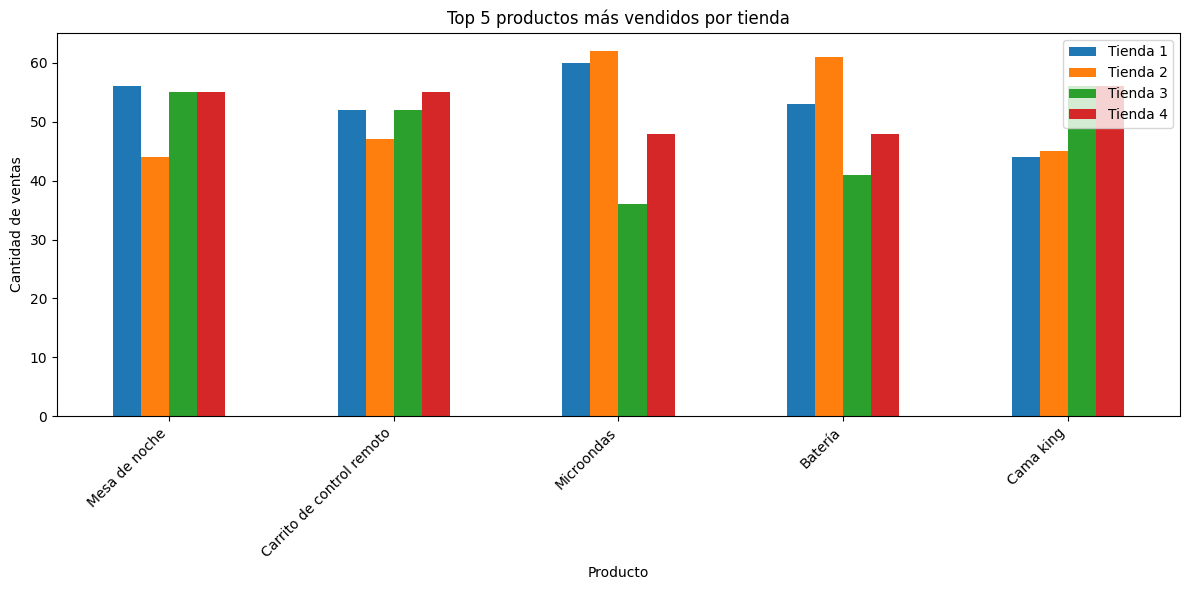

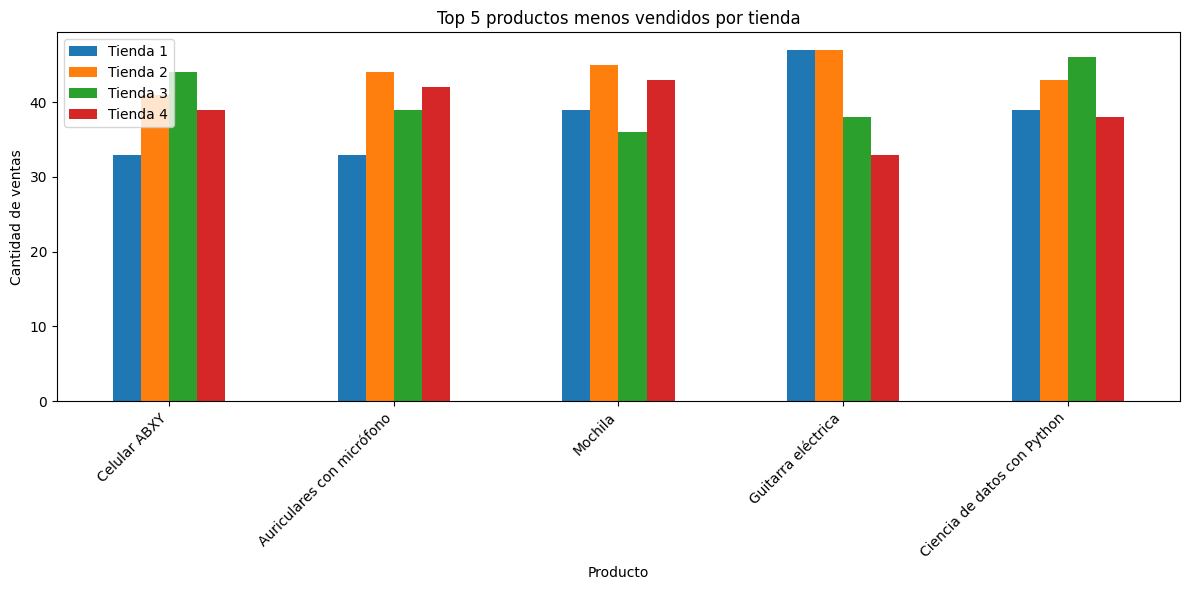

In [57]:
# Obtenga los 5 mejores productos en general
top_products_overall = all_products_count.sum(axis=1).sort_values(ascending=False).head(5).index

# Obtenga al menos 5 productos en total
least_products_overall = all_products_count.sum(axis=1).sort_values(ascending=True).head(5).index

# Crear un gráfico de barras agrupado para los 5 productos principales
all_products_count.loc[top_products_overall].plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 productos más vendidos por tienda")
plt.ylabel("Cantidad de ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Crear un gráfico de barras agrupado para al menos 5 productos
all_products_count.loc[least_products_overall].plot(kind="bar", figsize=(12, 6))
plt.title("Top 5 productos menos vendidos por tienda")
plt.ylabel("Cantidad de ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [50]:
# Calcular el coste medio de envío por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().round(2).sort_values(ascending=False)

# Resultados del envío promedio por tienda
print("Costo de envío promedio por tienda:\n")
print(envio_promedio)

Costo de envío promedio por tienda:

Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


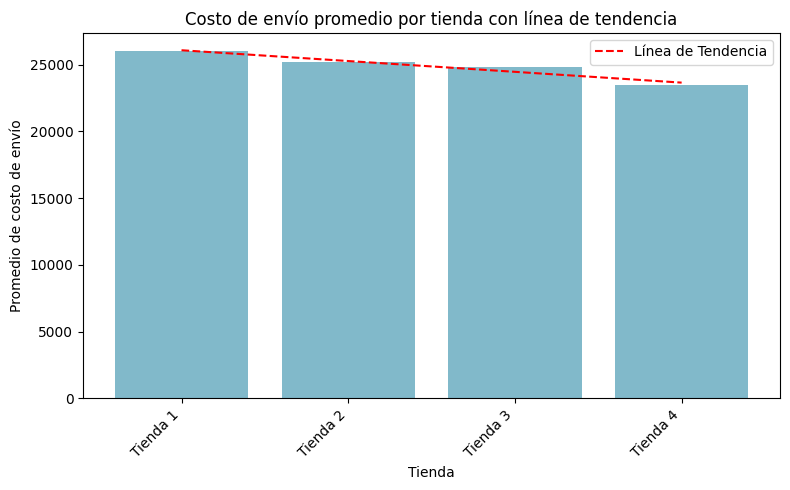

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar el costo promedio de envío por tienda
plt.figure(figsize=(8,5))
plt.bar(envio_promedio.index, envio_promedio.values, color="#81b9ca")

# Agregar línea de tendencia (regresión lineal simple)
z = np.polyfit(np.arange(len(envio_promedio)), envio_promedio.values, 1)
p = np.poly1d(z)
plt.plot(envio_promedio.index, p(np.arange(len(envio_promedio))), linestyle='--', color='red', label='Línea de Tendencia')

plt.title("Costo de envío promedio por tienda con línea de tendencia")
plt.ylabel("Promedio de costo de envío")
plt.xlabel("Tienda")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend()
plt.show()

###Recomendación de Tienda para el Sr. Juan###

El propósito de este análisis es evaluar el rendimiento de cuatro tiendas diferentes para determinar cuál sería la mejor opción para que don Juan venda. Para ello, se han considerado diversos factores clave, incluyendo los ingresos totales, las ventas por categoría de producto, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el costo promedio de envío.

##Análisis##

A continuación, se presentan los hallazgos principales de cada área de análisis:

Ingresos Totales: La "Tienda 1" presenta los mayores ingresos totales (1150,88 millones), seguida de cerca por la "Tienda2" (1116,34 millones) y la "Tienda 3" (1098,02 millones). La "Tienda4" tiene los menores ingresos (1038,38 millones). Este análisis sugiere que la "Tienda 1" tiene el mayor potencial de facturación.

Ventas por Categoría de Producto: El análisis de reveló que las categorías "Muebles" y "Electrónicos" son consistentemente las más vendidas en todas las tiendas. La distribución de ventas por categoría es relativamente similar entre las tiendas, lo que indica que no hay una tienda que destaque significativamente en una categoría particular.

Calificaciones Promedio de los Clientes: La "Tienda 3" tiene la calificación promedio más alta (4.05), seguida por la "Tienda 2" (4.04) y la "Tienda 4" (4.00). La "Tienda 1" tiene la calificación promedio más baja (3.98). Aunque las diferencias son pequeñas, la satisfacción del cliente es un factor importante a considerar.

Productos Más y Menos Vendidos: Se identificaron los productos más y menos vendidos en cada tienda y en general. Los productos más vendidos varían entre tiendas, lo que sugiere que cada tienda puede tener clientes con preferencias ligeramente diferentes. El conocimiento de estos productos puede ser útil para la gestión de inventario y estrategias de marketing.

Costo de Envío Promedio: La "Tienda 1" tiene el costo de envío promedio más alto (26,018), mientras que la "Tienda4" tiene el más bajo (23,459). El costo de envío puede impactar la rentabilidad y la satisfacción del cliente, especialmente para productos de bajo precio.

##Conclusión y Recomendación##

Considerando todos los factores analizados, la recomendación para el Sr. Juan es vender en la Tienda 1.

Aunque la "Tienda 1" tiene la calificación promedio de cliente más baja y el costo de envío más alto, su significativamente mayor ingreso total la posiciona como la opción más atractiva desde una perspectiva financiera. Los ingresos son un indicador clave del potencial de ventas y la salud general del negocio.

Si bien la satisfacción del cliente y los costos de envío son importantes, la diferencia en las calificaciones promedio es mínima y el impacto del costo de envío en la rentabilidad puede ser gestionado a través de estrategias de precios o negociación con proveedores de servicios de envío.

Las otras tiendas tienen puntos fuertes (por ejemplo, la "Tienda 3" en calificación promedio y la "Tienda 4" en costo de envío promedio), pero ninguna supera a la "Tienda 1" en el factor más crítico para un vendedor: el potencial de ingresos.

#Justificación Adicional#

La "Tienda 1" demuestra tener una base de clientes sólida que genera un alto volumen de ventas. Aunque se debe prestar atención a la mejora de la satisfacción del cliente y la optimización de los costos de envío, estos son desafíos manejables en comparación con la dificultad de aumentar los ingresos totales en tiendas con menor facturación.

Por lo tanto, basándonos en los datos y gráficos analizados, la "Tienda 1" ofrece el mayor potencial de éxito para el Sr. Juan.

#¡Extra! Análisis del desempeño geográfico#

Analice la distribución geográfica de las ventas utilizando datos de latitud y longitud para identificar patrones y su influencia en el rendimiento del almacén y las calificaciones de los clientes. Visualice los datos utilizando gráficos de dispersión o mapas de calor, incorporando potencialmente mapas interactivos con bibliotecas como Folium. Resume los hallazgos con respecto a los patrones geográficos y su impacto en el rendimiento de la tienda.

## Preparar datos geográficos



In [61]:
print(df[['lat', 'lon']].dtypes)

df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

print(df[['lat', 'lon']].isnull().sum())

lat    float64
lon    float64
dtype: object
lat    0
lon    0
dtype: int64


## Visualizar la distribución de ventas

mapa de calor utilizando los datos de latitud y longitud para visualizar la distribución de ventas.

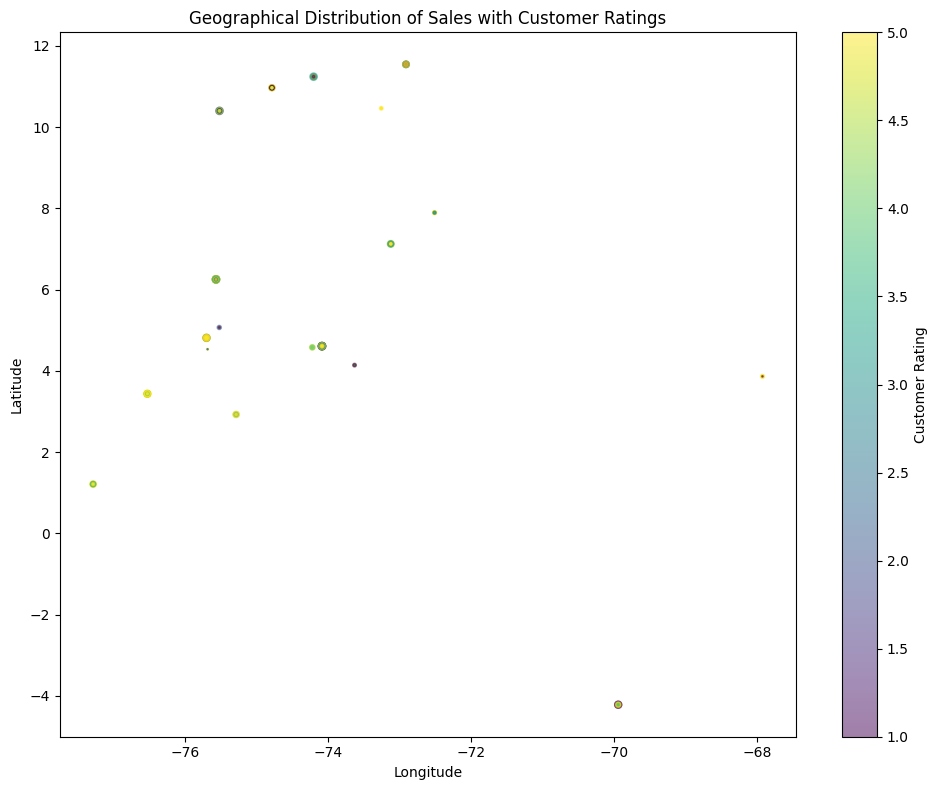

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['lon'], df['lat'], alpha=0.5, c=df['Calificación'], cmap='viridis', s=df['Precio']/100000)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Sales with Customer Ratings')
plt.colorbar(scatter, label='Customer Rating')
plt.tight_layout()
plt.show()

## Analizar patrones geográficos

Se identifica áreas con alta concentración de ventas y exploración cómo la ubicación podría influir en el rendimiento de las ventas y las calificaciones de los clientes para cada tienda.


En el diagrama de dispersión que muestra la distribución geográfica de las ventas, el color de cada punto representa la calificación del cliente para esa compra en particular. La barra de color a la derecha muestra el mapeo entre colores y valores de calificación.

Los colores más cálidos (por ejemplo, amarillo) indican clasificaciones de clientes más altas.
Los colores más fríos (por ejemplo, morado) indican clasificaciones de clientes más bajas.
Esto nos permite identificar visualmente si hay áreas geográficas con una satisfacción del cliente consistentemente mayor o menor.

In [63]:
# Basado en el análisis anterior y la trama de dispersión:
# 1. Observe la densidad de puntos para identificar áreas con alta concentración de ventas.
# 2. Examine la distribución de color dentro de áreas densas para ver qué tiendas están presentes.
# 3. Recuerde los ingresos totales, las ventas por categoría y las calificaciones de los clientes para cada tienda.
# 4. Sintetizar estas observaciones para inferir la influencia de la ubicación en las ventas y las calificaciones.

# La gráfica de dispersión confirma visualmente que las ventas se concentran en áreas geográficas específicas, probablemente correspondientes a las principales ciudades o regiones en Colombia (dados los rangos LAT/LON observados en la vista previa de datos).
# Al observar los colores en las áreas densas, es evidente que las cuatro tiendas tienen ventas en estos lugares de alta actividad, pero la concentración de color podría revelar si ciertas tiendas tienen una presencia más fuerte o un mayor volumen de ventas en áreas particulares.

# Del análisis anterior:

# - La Tienda 1 tuvo los ingresos totales más altos.
# - Tienda 3 tuvo la calificación promedio más alta del cliente.
# - Las categorías de productos como 'Muebles' y 'Electónicos' fueron los mejores vendedores en todas las tiendas.

# Interpretación basada en la trama y el análisis previo:
# El alto ingreso total de Tienda 1 sugiere que opera con éxito en áreas de ventas de alta densidad, o tal vez tiene un alcance más amplio dentro de estas áreas en comparación con otras tiendas.
# Tienda 3, a pesar de no tener los ingresos totales más altos, podría implicar que su base de clientes en sus ubicaciones principales (probablemente dentro de un área densa basada en la trama) está más satisfecho, o que sirve a un segmento específico dentro de esas ubicaciones de manera efectiva.
# La distribución de ventas por categoría en todas las tiendas sugiere que la demanda de categorías populares está muy extendida dentro de las áreas geográficas cubiertas por las tiendas. La trama geográfica ayuda a visualizar dónde se concentran estas demandas.
# La distribución geográfica que se muestra en la gráfica de dispersión se relaciona directamente con la columna 'Lugar de Compra' en los datos originales, que enumeraban ciudades como Bogotá, Medellín, Cartagena y Cali. Los grupos de puntos en el mapa probablemente corresponden a estas ciudades.

# En resumen, la distribución geográfica de las ventas se agrupa en áreas urbanas clave. Todas las tiendas tienen presencia en estas áreas. Los altos ingresos de Tienda 1 indican un fuerte rendimiento dentro de estas ubicaciones clave. La calificación más alta de Tienda 3 sugiere una buena satisfacción del cliente en sus áreas operativas. La visualización subraya la importancia de estas áreas geográficas concentradas para el rendimiento de las ventas en todas las tiendas.

## Resumen:

### Hallazgos de clave de análisis de datos

*   Las ventas están muy concentradas en áreas geográficas específicas, probablemente correspondientes a los principales centros urbanos.
* Las cuatro tiendas tienen una presencia de ventas dentro de estas áreas de alta concentración.
* El alto ingreso total de Tienda 1 sugiere un fuerte rendimiento dentro de estas ubicaciones geográficas clave, potencialmente debido a una mayor presencia o un mayor volumen de ventas en estas áreas.
* La calificación promedio más alta del cliente de Tienda 3 indica una buena satisfacción del cliente en sus áreas operativas dentro de estas ubicaciones concentradas.

### Próximos pasos

* Enfoque el marketing y los esfuerzos operativos en las áreas identificadas de concentración de alta venta.
* Investigue factores específicos dentro de las áreas de alta venta donde la Tienda 1 funciona excepcionalmente bien y donde Tienda 3 logra una alta satisfacción del cliente.